In [1]:
from fastai.vision import *
import torchvision as tv

In [2]:
print(tv.__version__)

0.3.0


In [3]:
folder = 'soup'
file = 'soup.url'
path = Path('data/liquid')

In [4]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
# download_images(path/file, dest, max_pics=200)

You will need to run this cell once per each category.

In [5]:
folder = 'drink'
file = 'drink.url'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
# download_images(path/file, dest, max_pics=200)

In [6]:
path.ls()

[WindowsPath('data/liquid/cleaned.csv'),
 WindowsPath('data/liquid/drink'),
 WindowsPath('data/liquid/drink.url'),
 WindowsPath('data/liquid/export.pkl'),
 WindowsPath('data/liquid/models'),
 WindowsPath('data/liquid/soup'),
 WindowsPath('data/liquid/soup.url')]

In [7]:
classes = ['drink','soup']

In [8]:
# for c in classes:
#     print(c)
#     verify_images(path/c, delete=True, max_size=500)

## View data

In [9]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

C:\Users\Stan\Anaconda3\lib\site-packages\fastai\vision\transform.py:227: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Stan\Anaconda3\lib\site-packages\fastai\vision\transform.py:227: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Stan\Anaconda3\lib\site-packages\fastai\vision\transform.py:227: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Stan\Anaconda3\lib\site-packages\fastai\vision\transform.py:227: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Stan\Anaconda3\lib\

C:\Users\Stan\Anaconda3\lib\site-packages\fastai\vision\transform.py:227: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Stan\Anaconda3\lib\site-packages\fastai\vision\transform.py:227: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Stan\Anaconda3\lib\site-packages\fastai\vision\transform.py:227: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Stan\Anaconda3\lib\site-packages\fastai\vision\transform.py:227: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Stan\Anaconda3\lib\

In [10]:
data.classes

['drink', 'soup']

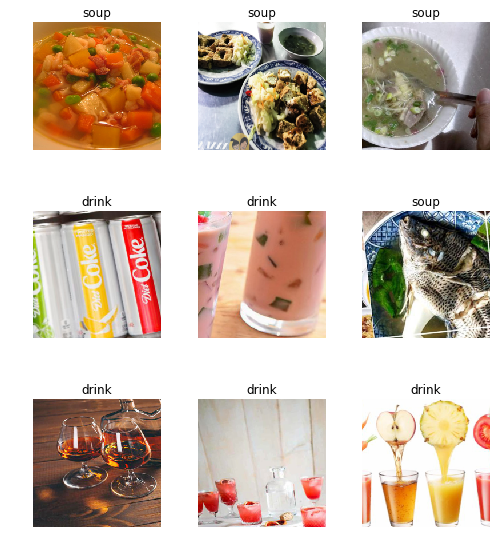

In [11]:
data.show_batch(rows=3, figsize=(7,8))

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['drink', 'soup'], 2, 147, 36)

## Train model

In [18]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [14]:
#learn.fit_one_cycle(4)

In [15]:
import  torch
torch.cuda.is_available()
torch.cuda.get_device_name(0)

'GeForce GTX 1050 Ti'

In [16]:
#learn.unfreeze()

In [17]:
#learn.lr_find()

In [18]:
#learn.recorder.plot()

In [19]:
#learn.fit_one_cycle(4, max_lr=slice(3e-5,3e-4))

In [20]:
#learn.save('stage-2')

## Interpretation

In [21]:
learn.load('stage-2');

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

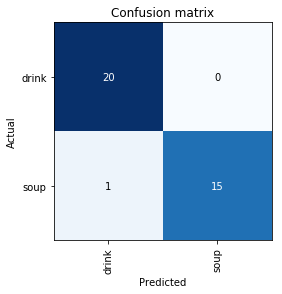

In [23]:
interp.plot_confusion_matrix()

In [24]:
from fastai.widgets import *

In [25]:
db = (ImageList.from_folder(path)
                   .no_split()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )


C:\Users\Stan\Anaconda3\lib\site-packages\fastai\data_block.py:171: UserWarning: `no_split` is deprecated, please use `split_none`.
  warn("`no_split` is deprecated, please use `split_none`.")


In [26]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [27]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln
                                             , ds_type=DatasetType.Valid
                                             , n_img=20)

In [28]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [29]:
ds, idxs = DatasetFormatter().from_similars(learn, 
                                            ds_type=DatasetType.Valid, 
                                            n_imgs=10)

Getting activations...


Computing similarities...


In [30]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [32]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, folder=".", csv_labels="cleaned.csv",
        ds_tfms=get_transforms(), size=224, num_workers=0).normalize(imagenet_stats)
data.classes

['drink', 'soup']

In [33]:
import fastai; fastai.__version__

'1.0.52'

In [16]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)

NameError: name 'cnn_learner' is not defined

In [ ]:
#learn = cnn_learner(data, models.resnet34, metrics=error_rate)
#learn.load('stage-1')

In [35]:
learn.unfreeze()

In [36]:
learn.fit_one_cycle(4, max_lr=slice(3e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.112824,0.185238,0.068965,00:04
1,0.099618,0.180770,0.068965,00:03
2,0.088869,0.181344,0.068965,00:02
3,0.078991,0.178480,0.068965,00:03


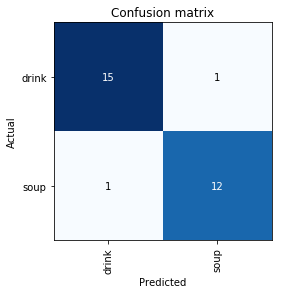

In [37]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [38]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


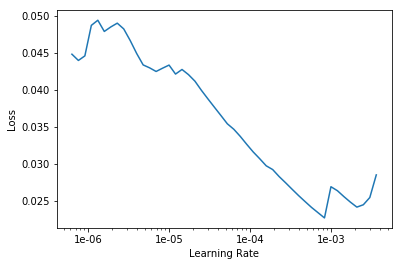

In [39]:
learn.recorder.plot()

In [40]:
learn.save('model3')

In [19]:
learn.load('model3')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (147 items)
[Category drink, Category drink, Category drink, Category drink, Category drink]...
Path: data\liquid
x: ImageItemList (147 items)
[Image (3, 500, 500), Image (3, 250, 500), Image (3, 500, 500), Image (3, 500, 233), Image (3, 333, 500)]...
Path: data\liquid;

Valid: LabelList
y: CategoryList (36 items)
[Category drink, Category drink, Category soup, Category soup, Category soup]...
Path: data\liquid
x: ImageItemList (36 items)
[Image (3, 250, 500), Image (3, 270, 500), Image (3, 333, 500), Image (3, 286, 500), Image (3, 333, 500)]...
Path: data\liquid;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Ba

In [20]:
mpath = os.getcwd()+ "/models"
final_model_name='model.pkl'
shutil.rmtree(mpath ,ignore_errors=True)
if not os.path.exists(mpath):
        os.mkdir(mpath)      

In [21]:
learn.export(mpath+f"/{final_model_name}")

### Export whole classifier

In [ ]:
#learn.export() #export much thing include model,learn obj (metadata like the classes or the transforms/normalization used)

In [14]:
learn = load_learner(path=mpath, fname=final_model_name)

C:\Users\Stan\Anaconda3\lib\site-packages\torch\serialization.py:454: SourceChangeWarning: source code of class 'fastai.layers.AdaptiveConcatPool2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
C:\Users\Stan\Anaconda3\lib\site-packages\torch\serialization.py:454: SourceChangeWarning: source code of class 'fastai.layers.Flatten' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


AttributeError: Can't get attribute 'ImageList' on <module 'fastai.vision.data' from 'C:\\Users\\Stan\\Anaconda3\\lib\\site-packages\\fastai\\vision\\data.py'>

Category drink

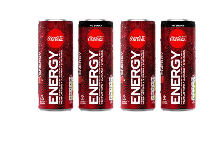

In [76]:
img = open_image(path/'drink'/'00000079.jpg')
img.show()
pred_class,pred_idx,outputs = learn.predict(img)
pred_class